<a href="https://colab.research.google.com/github/shraddhanikam/INeuron-EXam/blob/main/predict_instalike_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import re
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings('ignore')

In [7]:
data=pd.read_csv("instagram_reach.csv")


In [8]:
data.head(10)

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
5,5,6,be.masterly,Cyber attacks are more frequent every day and ...,1231,#edtech #learning#educationtechnology #tech #l...,3 hours,18
6,6,7,lenovoworkstations,Check it out – we’re walking across the 🌎’s fi...,259,.#Tech #virtualreality #IoT #Machinelearning,3 hours,35
7,7,8,kirellb,Here's a network I made that depicts the scien...,1433,#datascientist #creativetechnology#design #art...,4 hours,86
8,8,9,ethicsandai,Having a great week at @ldntechweek exploring ...,13,#LTW #London #TechXLR8 #Technology#AI #Artific...,4 hours,22
9,9,10,diworksolucionesdeti,The Internet of Things : A Very Short Story [#...,450,[#Infographic] #Wearable #Sensors #MachineLear...,7 hours,18


In [9]:
data.shape

(100, 8)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [11]:
data.describe()

,Unnamed: 0,S.No,Followers,Likes
count,100.000000,100.000000,100.00000,100.00000
mean,8.940000,16.240000,961.96000,46.48000
std,6.639064,7.384286,1014.62567,55.08698
min,0.000000,1.000000,11.00000,8.00000
25%,4.000000,10.750000,252.75000,19.00000
50%,8.000000,16.500000,612.00000,29.00000
75%,12.250000,22.250000,1197.00000,46.00000
max,26.000000,30.000000,4496.00000,349.00000


In [13]:
# check null values
data.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [17]:
data=data.dropna()

In [19]:
data.isnull().sum().sum()

0

In [20]:
data.columns

Index(['Unnamed: 0', 'S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Time since posted', 'Likes'],
      dtype='object')

In [21]:
data.head(1)

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139


In [22]:
#drop not useful coloums
data= data.drop(['Unnamed: 0', 'S.No'], axis=1)


In [24]:
data.columns


Index(['USERNAME', 'Caption', 'Followers', 'Hashtags', 'Time since posted',
       'Likes'],
      dtype='object')

In [27]:
data.head(2)

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23


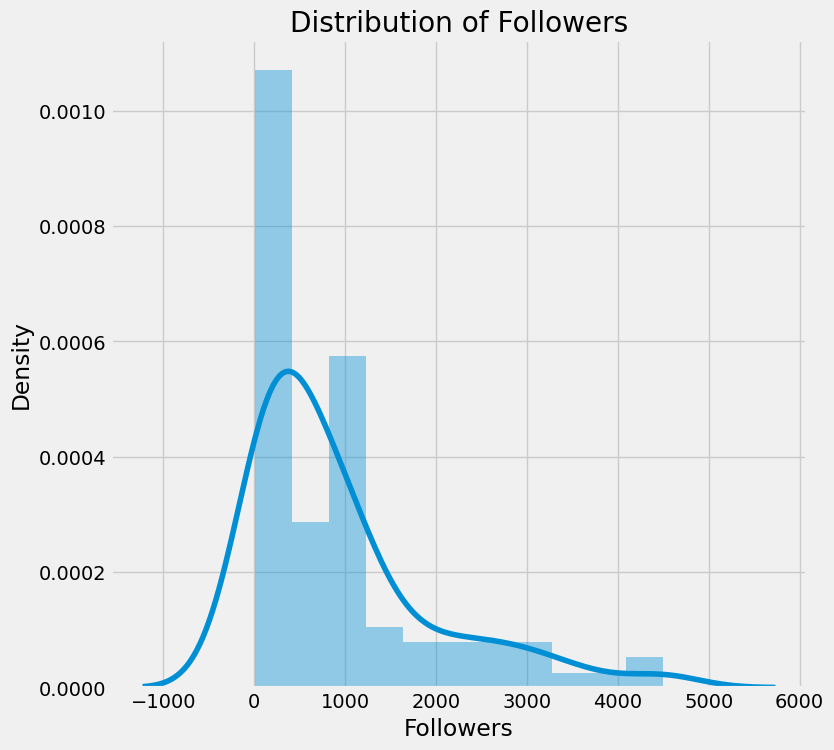

In [35]:
#analyze data
## Distribution of Followers

plt.figure(figsize=(8, 8))
plt.title("Distribution of Followers")
sns.distplot(data['Followers'])
plt.show()

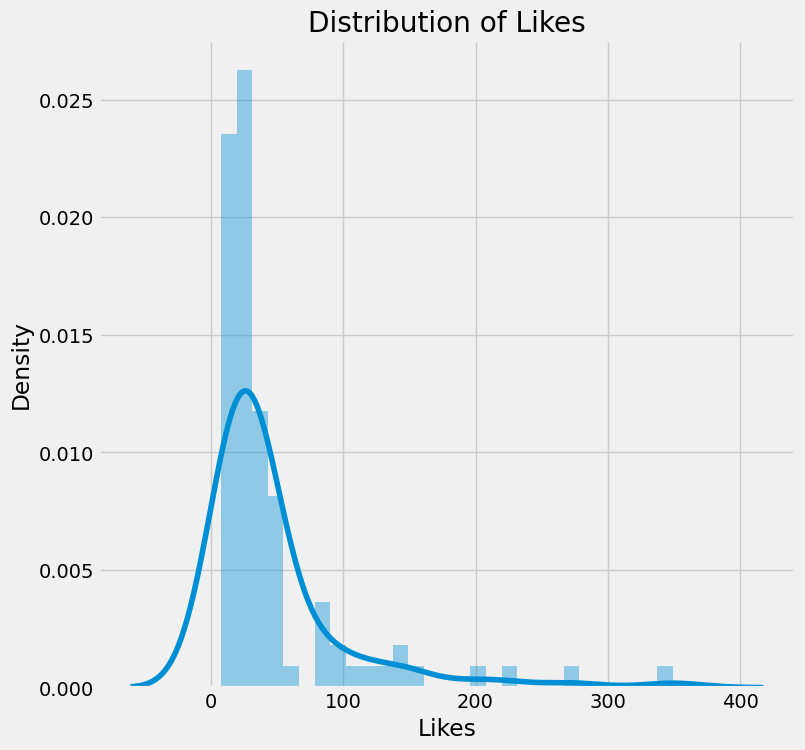

In [34]:
## Distribution of likes
plt.figure(figsize=(8, 8))
plt.title("Distribution of Likes")
sns.distplot(data['Likes'])
plt.show()

In [37]:
## Relation between Likes and Followers

followers = data["Followers"].sum()
likes = data["Likes"].sum()

labels = ['Followers', 'Likes']
values = [followers, likes]

fig = px.pie(data, values=values, names=labels,
             title='Instagram Posts From different Sources', hole=0.5)
fig.show()

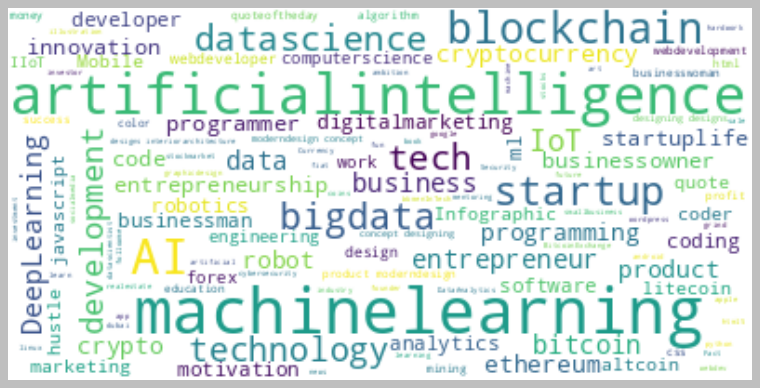

In [38]:
## Plotting Word-Cloud for Hashtag Related Data

text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [39]:
## Plotting Scatter-plot for showing Relationship Between Likes and Followers

figure = px.scatter(data_frame = data, x="Likes",
                    y="Followers", trendline="ols",
                    title = "Relationship Between Likes and Followers")
figure.show()

In [47]:
# Select the relevant features and target variables

features = ['USERNAME', 'Caption', 'Hashtags', 'Followers']
target_likes = 'Likes'
target_time_since_posted = 'Time since posted'

In [41]:
# Split the data into training and testing sets

X = data[features]
y_likes = data[target_likes]
y_time_since_posted = data[target_time_since_posted]
X_train, X_test, y_likes_train, y_likes_test, y_time_since_posted_train, y_time_since_posted_test = train_test_split(X, y_likes, y_time_since_posted, test_size=0.2, random_state=42)


In [49]:
# Preprocess the text features using one-hot encoding
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

In [52]:
# Train a model to predict the number of likes
likes_model = LinearRegression()
likes_model.fit(X_train_encoded, y_likes_train)
score=likes_model.score(X_train_encoded, y_likes_train)
print("score:",score)
likes_predictions = likes_model.predict(X_test_encoded)
likes_mse = mean_squared_error(y_likes_test, likes_predictions)
print("Mean Squared Error (Likes):", likes_mse)

score: 1.0
Mean Squared Error (Likes): 2295.2229243071724


In [55]:
#from sklearn.metrics import r2_score

In [63]:
#r2_score(y_likes_test,likes_predictions)

In [44]:
# Preprocess the time since posted variable
def extract_numerical_value(time_string):
    numerical_value = re.findall(r'\d+', time_string)[0]
    return int(numerical_value)

In [45]:
y_time_since_posted_train = y_time_since_posted_train.apply(extract_numerical_value)
y_time_since_posted_test = y_time_since_posted_test.apply(extract_numerical_value)

In [61]:
# Train a model to predict the time since posted
time_since_posted_model = LinearRegression()
time_since_posted_model.fit(X_train_encoded, y_time_since_posted_train)
time_since_posted_predictions = time_since_posted_model.predict(X_test_encoded)
time_since_posted_mse = mean_squared_error(y_time_since_posted_test, time_since_posted_predictions)
print("Mean Squared Error (Time Since Posted):", time_since_posted_mse)

Mean Squared Error (Time Since Posted): 14.27362332233911


In [58]:
f#rom sklearn.metrics import r2_score

In [62]:
#r2_score(y_time_since_posted_test, time_since_posted_predictions)